In [1]:
import tensorflow as tf

In [2]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     tf.config.experimental.set_memory_growth(gpus[0], True)
#   except RuntimeError as e:
#     # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
#     print(e)

### 라이브러리 선언

일반 CPU 활용 시

In [3]:
# # 라이브러리 정의 
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# import pandas as pd

cuda nvidia gpu 활용 시

In [4]:
# # How to check if the code is running on GPU or CPU?

# from tensorflow.python.client import device_lib

# print(device_lib.list_local_devices())

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]='1'

intel gpu 활용 시

In [5]:
# import numpy as np
# import os

# # intel gpu 적용
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# import keras
# # mnist 데이터셋 
# from keras.datasets import mnist


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score

from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
%matplotlib inline

In [7]:
url = 'https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/pima-indians-diabetes.csv'
data = pd.read_csv(url)
data.head()

,pregnancies,glucose,diastolic,trceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# test = [1,2,3,4,5]

# [ test[i] + 1 for i in range(0, len(test))]

# 1. 타입 통합 / 특성 숫자컬럼 추가

### Skip

# 2. 데이터 분리

In [9]:
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'trceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [10]:
# 데이터 분리
featuresData = data.drop(columns=['diabetes'])
labelData = data['diabetes']

trainingData_features,\
testData_features,\
trainingData_label,\
testData_label = train_test_split(featuresData,labelData, test_size=0.2, random_state=1)

In [11]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_label.shape)
print(testData_label.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [12]:
features = list(trainingData_features.select_dtypes(np.number).columns)

In [13]:
features

['pregnancies',
 'glucose',
 'diastolic',
 'trceps',
 'insulin',
 'bmi',
 'dpf',
 'age']

# 3. 모델 생성

In [14]:
modelDim = trainingData_features.reset_index(drop=True).loc[0].shape

In [15]:
model = Sequential()
### 4개의 feature 가 행으로 입력됨
#Hidden Layer-1
unitNo = 8
model.add(Dense(unitNo, activation='relu', input_shape = modelDim))
#Hidden Layer-2
model.add(Dense(unitNo, activation='relu'))
#Output layer
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


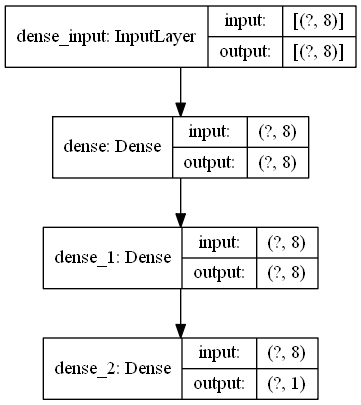

In [16]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)

# 4. 모델 컴파일

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 5. 모델 학습

In [18]:
# 라이브러리 및 로그 디렉토리 정의 join
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from datetime import datetime
import os

logdir = os.path.join("logs",datetime.now().strftime("%Y%m%d_%H%M%S"))

In [19]:
# 콜백 옵션 정의
callbacks = [
    TensorBoard(
    log_dir = logdir),
    
    ModelCheckpoint(
        "model_b_out.h5", monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
]

In [20]:
# 훈련
history = model.fit(x=trainingData_features,
                         y=trainingData_label,
                         epochs=100,
                         batch_size=32,
                         callbacks=callbacks,
                         validation_split=0.2)


Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 4.8709 - accuracy: 0.4664
Epoch 00001: val_accuracy improved from -inf to 0.60163, saving model to model_b_out.h5
16/16 [==============================] - 0s 26ms/step - loss: 4.8709 - accuracy: 0.4664 - val_loss: 2.7307 - val_accuracy: 0.6016
Epoch 2/100
15/16 [===========================>..] - ETA: 0s - loss: 2.7630 - accuracy: 0.5958
Epoch 00002: val_accuracy did not improve from 0.60163
16/16 [==============================] - 0s 6ms/step - loss: 2.7829 - accuracy: 0.5886 - val_loss: 2.3019 - val_accuracy: 0.5203
Epoch 3/100
15/16 [===========================>..] - ETA: 0s - loss: 2.1515 - accuracy: 0.5396
Epoch 00003: val_accuracy did not improve from 0.60163
16/16 [==============================] - 0s 7ms/step - loss: 2.1924 - accuracy: 0.5316 - val_loss: 1.9540 - val_accuracy: 0.5203
Epoch 4/100
15/16 [===========================>..] - ETA: 0s - loss: 1.9052 - accuracy: 0.5083
Epoch 00004: val_accuracy did not 

In [21]:
trainingLog  = pd.DataFrame(history.history)

In [22]:
trainingLog.tail(10)

,loss,accuracy,val_loss,val_accuracy
90,0.545098,0.731161,0.526348,0.756098
91,0.545865,0.725051,0.565445,0.707317
92,0.540853,0.727088,0.530250,0.747967
93,0.546651,0.727088,0.535806,0.739837
94,0.540137,0.745418,0.537547,0.756098
95,0.561463,0.688391,0.530477,0.739837
96,0.548815,0.725051,0.521085,0.764228
97,0.549190,0.729124,0.534117,0.764228
98,0.550780,0.714868,0.531356,0.739837
99,0.573186,0.700611,0.542502,0.764228


In [23]:
model.evaluate(testData_features, testData_label)

5/5 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.6883


[0.6066891551017761, 0.6883116960525513]

In [24]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,4.870868,0.466395,2.730652,0.601626
1,2.782931,0.588595,2.301899,0.520325
2,2.192392,0.531568,1.953964,0.520325
3,1.902803,0.511202,1.703166,0.544715
4,1.764861,0.527495,1.413931,0.585366
...,...,...,...,...
95,0.561463,0.688391,0.530477,0.739837
96,0.548815,0.725051,0.521085,0.764228
97,0.549190,0.729124,0.534117,0.764228
98,0.550780,0.714868,0.531356,0.739837


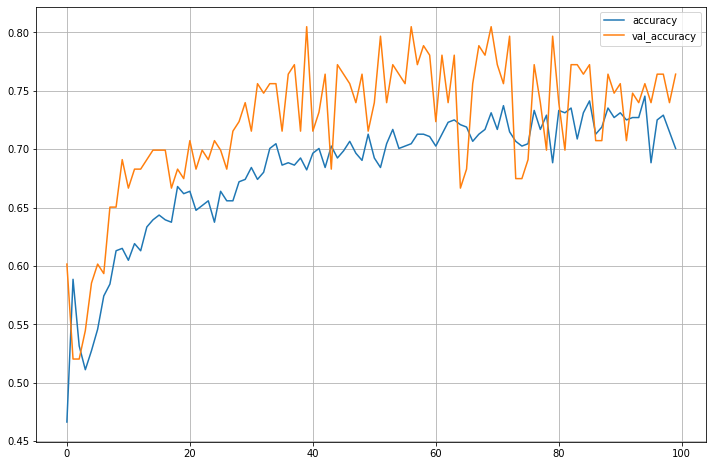

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
# 훈련 데이터의 mse
plt.plot(history.history['accuracy'])
# 검증 데이터의 mse
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()
plt.show()

In [26]:
pd.DataFrame(history.history).tail()

,loss,accuracy,val_loss,val_accuracy
95,0.561463,0.688391,0.530477,0.739837
96,0.548815,0.725051,0.521085,0.764228
97,0.549190,0.729124,0.534117,0.764228
98,0.550780,0.714868,0.531356,0.739837
99,0.573186,0.700611,0.542502,0.764228


# 6. 모델 추론

In [27]:
import math
# 정확도 추론
loss, accuracy = model.evaluate(testData_features, testData_label, verbose=1)
print(loss)
print(accuracy)

5/5 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.6883
0.6066891551017761
0.6883116960525513


# 7. 모델 예측

In [28]:
# 가상의 환자 데이터 입력
patient_1 = pd.DataFrame([[0,137,90,35,168,43.1,2.288,33]])

# 모델로 예측하기
prediction = model.predict(patient_1)
prediction

array([[0.41832632]], dtype=float32)

In [29]:
# 예측결과 출력하기
print(prediction*100)

[[41.83263]]


### [실습] 
diabetes 동일 데이터를 활용하여 다음장 학습 종료 후 sigmoid 와 softmax를 활용하여 예측정확도를 비교해보세요.

In [30]:
from tensorflow.keras import backend as K

K.clear_session()
from numba import cuda
cuda.select_device(0)
cuda.close()